In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications import DenseNet121,InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
# Specific neural network models & layer types
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

> Mount drive to access dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to Images Dataset Images
Images_path_part1 = '/content/drive/MyDrive/Data/HAM10000_images_part_1'
Images_path_part2 = '/content/drive/MyDrive/Data/HAM10000_images_part_2'

# Path to All Images in Dataset
final_path = '/content/drive/MyDrive/Data/All_Images'

In [ ]:
"""
def copy_image_files(src_folder, dest_folder):
    """
"""
    Copy image files from the source folder to the destination folder.

    Parameters:
    src_folder (str): Path to the source folder containing image files.
    dest_folder (str): Path to the destination folder where image files will be copied.

    Returns:
    None
    """
"""
    for filename in os.listdir(src_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            shutil.copy(os.path.join(src_folder, filename), dest_folder)


# Create the destination folder if it doesn't exist
if not os.path.exists(final_path):
    os.makedirs(final_path)

copy_image_files(Images_path_part1, final_path)
copy_image_files(Images_path_part2, final_path)

"""

"\n    for filename in os.listdir(src_folder):\n        if filename.endswith('.jpg') or filename.endswith('.png'):\n            shutil.copy(os.path.join(src_folder, filename), dest_folder)\n\n\n# Create the destination folder if it doesn't exist\nif not os.path.exists(final_path):\n    os.makedirs(final_path)\n\ncopy_image_files(Images_path_part1, final_path)\ncopy_image_files(Images_path_part2, final_path)\n\n"

> Code above is commented in order to save execution time.

In [ ]:
meta_data_df = pd.read_csv('/content/drive/MyDrive/Data/Updated_metadata.csv')
meta_data_df.sample(5)

,lesion_id,image_id,Diagnosis,Confirmation_Method,Age,Sex,Location,Image_path,Updated_Diagnosis_Label
1982,HAM_0003449,ISIC_0027263,mel,histo,85,male,back,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4
9313,HAM_0005426,ISIC_0028902,nv,follow_up,40,female,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
5842,HAM_0003100,ISIC_0028976,nv,follow_up,70,female,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
2055,HAM_0001602,ISIC_0032458,nv,follow_up,55,male,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
6799,HAM_0006453,ISIC_0030192,mel,histo,70,male,abdomen,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4


In [ ]:
# Add Images' Path to Metadata
meta_data_df['Image_path'] = meta_data_df['image_id'].apply(lambda x: os.path.join(final_path, f"{x}.jpg"))
#Save Meta Data to new file
meta_data_df.to_csv('/content/drive/MyDrive/Data/Updated_metadata.csv',index=False)

In [ ]:
meta_data_df

,lesion_id,image_id,Diagnosis,Confirmation_Method,Age,Sex,Location,Image_path,Updated_Diagnosis_Label
0,HAM_0007180,ISIC_0033272,mel,histo,65,male,face,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4
1,HAM_0007195,ISIC_0031923,nv,histo,40,female,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
2,HAM_0001835,ISIC_0026652,mel,histo,65,male,back,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4
3,HAM_0000465,ISIC_0030583,bkl,consensus,35,female,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,2
4,HAM_0001720,ISIC_0034010,nv,histo,45,male,abdomen,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
...,...,...,...,...,...,...,...,...,...
10010,HAM_0005460,ISIC_0028199,nv,follow_up,50,female,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
10011,HAM_0005615,ISIC_0031067,nv,follow_up,45,female,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
10012,HAM_0005773,ISIC_0031096,nv,follow_up,45,female,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
10013,HAM_0001053,ISIC_0030998,bkl,consensus,55,female,chest,/content/drive/MyDrive/Data/All_Images/ISIC_00...,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'Region_Of_Disease' column
meta_data_df['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data_df['Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping = {value: key for key, value in label_mapping.items()}
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}


In [ ]:
meta_data_df.sample(5)

,lesion_id,image_id,Diagnosis,Confirmation_Method,Age,Sex,Location,Image_path,Updated_Diagnosis_Label
1836,HAM_0002237,ISIC_0028053,nv,follow_up,55,male,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
6963,HAM_0002103,ISIC_0026034,nv,histo,60,male,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
1997,HAM_0001601,ISIC_0031029,bkl,histo,75,male,upper extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,2
6306,HAM_0005772,ISIC_0031017,bkl,histo,60,female,face,/content/drive/MyDrive/Data/All_Images/ISIC_00...,2
452,HAM_0000369,ISIC_0029400,nv,follow_up,55,female,upper extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5


# Base Model
This Model will be done without working on the Class Imbalance

In [ ]:
# Shuffle Dataset
meta_data_df = meta_data_df.sample(frac=1, random_state=42).reset_index(drop=True)
meta_data_df

,lesion_id,image_id,Diagnosis,Confirmation_Method,Age,Sex,Location,Image_path,Updated_Diagnosis_Label
0,HAM_0003445,ISIC_0026229,mel,histo,65,male,abdomen,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4
1,HAM_0004434,ISIC_0024744,nv,follow_up,50,female,back,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
2,HAM_0005867,ISIC_0032387,nv,follow_up,65,female,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
3,HAM_0006679,ISIC_0031267,nv,follow_up,40,male,upper extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
4,HAM_0006152,ISIC_0029571,mel,histo,55,female,upper extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4
...,...,...,...,...,...,...,...,...,...
10010,HAM_0005610,ISIC_0025312,bkl,confocal,65,female,face,/content/drive/MyDrive/Data/All_Images/ISIC_00...,2
10011,HAM_0004745,ISIC_0028004,nv,follow_up,60,male,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
10012,HAM_0004419,ISIC_0031331,nv,follow_up,50,female,trunk,/content/drive/MyDrive/Data/All_Images/ISIC_00...,5
10013,HAM_0003466,ISIC_0034132,mel,histo,70,female,lower extremity,/content/drive/MyDrive/Data/All_Images/ISIC_00...,4


In [ ]:

# Separate features (X) and target variable (y)
X = meta_data_df.drop(columns=['Updated_Diagnosis_Label'])
y = meta_data_df['Updated_Diagnosis_Label']

# Display the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (10015, 8)
Shape of target variable (y): (10015,)


In [ ]:
#train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# To visualize  Class Labels
viz_datagen = ImageDataGenerator(rescale=1./255)
viz_generator = viz_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)


Found 5608 validated image filenames belonging to 7 classes.


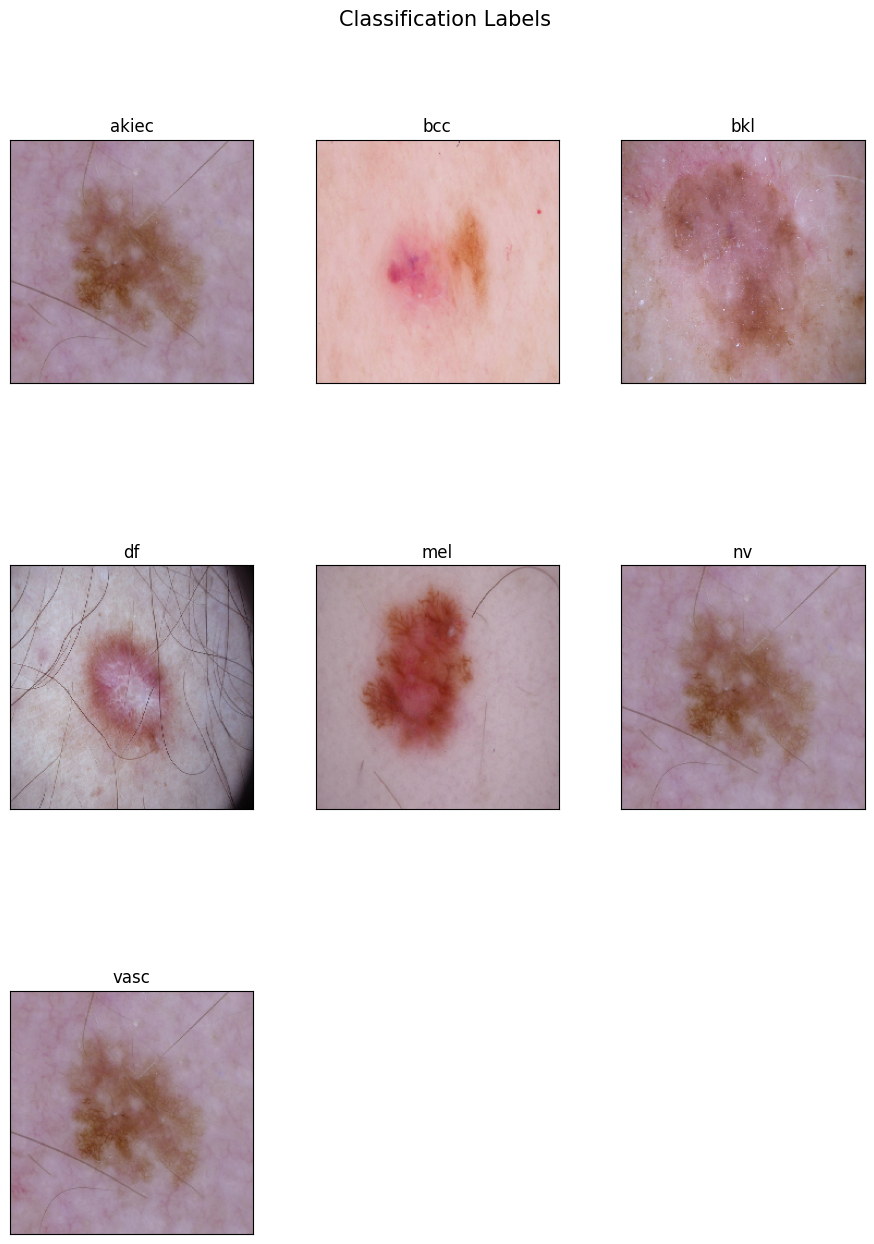

In [ ]:
# Grab a batch of images from our validation generator:
x_1, y_1 = next(viz_generator)
# Our images labels are one-hot encoded, lets
# convert them to ordinal encoding
labels = np.argmax(y_1, axis=1)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9, 14))
ax = ax.flatten()

for i in range(7):
    index = np.argmax(labels==i)
    ax[i].imshow(x_1[index])

    # Set the title of the subplot
    ax[i].set_title(label_mapping[i])

    # Hide the x and y ticks
    ax[i].set_xticks([])
    ax[i].set_yticks([])


fig.suptitle("Classification Labels", size = 15)
fig.tight_layout()

# Delete the two unused subplots
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])

plt.show()

In [ ]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5608 validated image filenames belonging to 7 classes.
Found 1402 validated image filenames belonging to 7 classes.
Found 3005 validated image filenames belonging to 7 classes.


### ResNet-50


In [ ]:
import random

def set_random_seed(seed):

    '''Random seeds for reproducability'''

    random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.applications import ResNet50V2

height = 224
width = 224
channels = 3

res_model = ResNet50V2(weights='imagenet',
                   include_top=False,
                   input_shape=(height,width,channels))
res_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
# Freeze all the layers in the base model
for layer in res_model.layers:
    layer.trainable = False

> Freeze all layers to reduce the risk of overfitting by preserving the generalization ability of the model

In [ ]:
from tensorflow.keras.models import Model
#daisy chain, the output of one layer becomes the input of another via function arg

set_random_seed(121)
x = res_model.output

flattened = Flatten()(x)
dense1 = Dense(128, activation='relu')(flattened)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(7, activation='softmax')(dense2)


# Model
model = Model(inputs=res_model.input,
              outputs=output)

> A Dense layer with 7 neurons and softmax activation for multi-class classification tasks.
>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

set_random_seed(121)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Use an early stopping callback to stop training
# once we no longer have improvements in our validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=2,
                           mode='min',
                           verbose=1)
history = model.fit(train_generator,
          epochs=10,
          validation_data = val_generator,
          callbacks=[early_stop])

Epoch 1/10
176/176 [==============================] - 127s 699ms/step - loss: 1.9775 - accuracy: 0.6464 - val_loss: 1.0171 - val_accuracy: 0.6862
Epoch 2/10
176/176 [==============================] - 122s 692ms/step - loss: 0.9326 - accuracy: 0.7052 - val_loss: 0.9026 - val_accuracy: 0.6719
Epoch 3/10
176/176 [==============================] - 122s 695ms/step - loss: 0.8105 - accuracy: 0.7168 - val_loss: 0.7757 - val_accuracy: 0.7168
Epoch 4/10
176/176 [==============================] - 122s 693ms/step - loss: 0.7471 - accuracy: 0.7356 - val_loss: 0.7628 - val_accuracy: 0.7425
Epoch 5/10
176/176 [==============================] - 123s 696ms/step - loss: 0.7238 - accuracy: 0.7455 - val_loss: 0.7646 - val_accuracy: 0.7304
Epoch 6/10
176/176 [==============================] - 122s 693ms/step - loss: 0.7033 - accuracy: 0.7514 - val_loss: 0.7665 - val_accuracy: 0.7175
Epoch 6: early stopping


> Model trained with early stop to prevent overfitting.

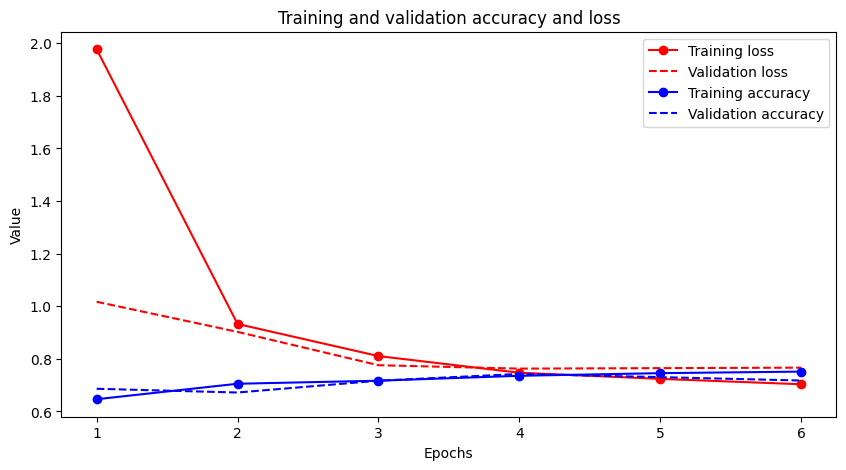

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy and loss on the same graph
plt.figure(figsize=(10, 5))

# Plot loss
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')

# Plot accuracy
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')

plt.title('Training and validation accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
X_test , y_test = next(test_generator)

# Evaluate the model's performance on the test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 71ms/step - loss: 0.9166 - accuracy: 0.7188
Test loss: 0.9165748953819275
Test accuracy: 0.71875


In [ ]:
# Calculate the predictions
predict_probas = model.predict(X_test)

# Convert probabilities to label encoding
y_predict = np.argmax(predict_probas, axis=1)
print(y_predict)

1/1 [==============================] - 0s 33ms/step
[5 5 5 2 5 5 5 1 5 2 5 1 5 4 5 1 5 5 0 5 4 2 1 5 5 5 5 4 4 5 5 5]


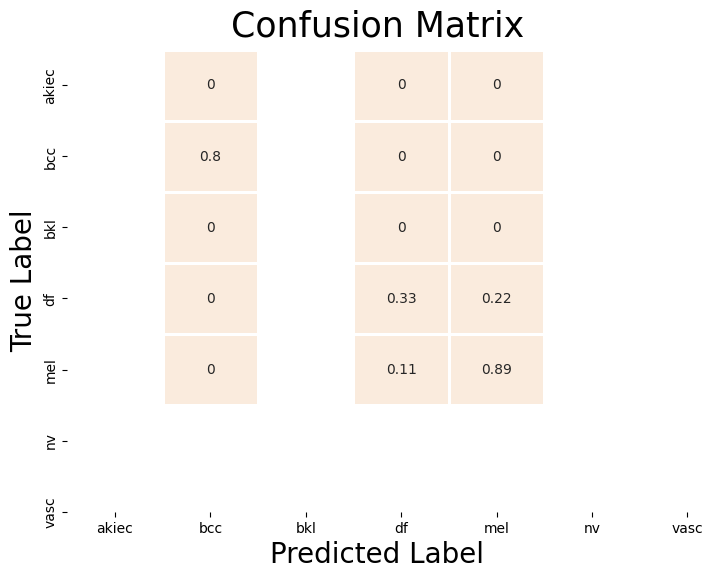

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert our test labels from one-hot encoding to label encoding
y_test_labels = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test_labels, y_predict)
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

plt.figure(figsize = (8,6))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values(),
            cmap="rocket_r",
            linewidths=1,

           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

# Additive smoothing

> Other classes are not shown because there are only 5 classes in the Test set.
> This confusion matric also suggests that the model will work well for `BCC`, `DF` and `MEL`.  
> This is due to `Class Imbalance`

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Data/ResNet.pkl','wb'))

In [ ]:
from tensorflow.keras.models import save_model
save_model(model,'/content/drive/MyDrive/Data/ResNet.h5')

In [ ]:
model.output_shape

(None, 7)